<a href="https://colab.research.google.com/github/ncolombotto/Proyecto_DatScience_Coder/blob/main/Segunda_Entrega_Colombotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Proyecto Data Science
##Ranking Spotify Febrero 2023
**Abstract**

El Dataset contiene información sobre distintos aspectos de las canciones que se encuentran es Spotify.

Cuenta con datos cualitativos (tonalidad, ritmo, energía, etc) y cuantitativos (cantidad de reproducciones, comentarios, etc) de 20.718 canciónes individuales.

Los datos fueron extraídos al 7 de Febrero de 2023 por lo que la cantidad de reprocducciones, visualizaciones, comentarios y cualquier otro dato variable habrá cambiado a esta altura.

Es necesario aclarar que no se están tomando en cuenta canciones que se hayan incorporado a Spotify después de esa fecha.

Fuete: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

##Contexto

Conocer las características distintivas de las canciones que pueden generar interes del público puede ser de gran valor para productores musicales y artistas que quieran tener un marco de referencia.

Aunque creemos que hay factores extramusicales que influyen en el interes por un artista o una canción, el conocimiento de parámetros formales brinda información relevante a la hora de componer.

##Hipótesis y líneas de análisis
Con el presente dataset trataremos de identificar variables que expliquen por qué una canción o artista son más escuchados que otros.

Partimos de la hipótesis que las cualidades intrínsicas de la canción como la tonalidad en la que está compuesta, su ritmo, la posibilidad de ser bailada o su energía son relevantes en este aspecto.

##Importo Librerías y Establezco Conexión con Drive

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os
drive.mount ("/content/gdrive")

Mounted at /content/gdrive


##Cargo el archivo

In [ ]:
df_Spotify = pd.read_csv ("/content/gdrive/MyDrive/Coderhouse/Data Science/Entregas/Primer Desafío/Spotify_Youtube.csv")

# Spotify

Comenzamos con un análisis rápido del dataset.

In [ ]:
df_Spotify.head(1)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [ ]:
df_Spotify.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

##Descripción de las Variables del DataSet

Spotify y YouTube

* Artist
  * Artista

* Track
  * Canción

* Album

  * Disco

* Albumm_type

  * Indica si la canción es parte de un disco o si fue lanzada como sinlge en Spotify

* Uri
  * Link de Spotify usado para encontrar la canción via API

* Danceability
  * Describe qué tan bailable es la canción en base elementos musicales como el tempo, el ritmo, etc. El valor 0.0 es menos bailable y el valor 1.0 es más bailable.

* Energy

  * Es una medida entre 0.0 y 1.0 que representa la percepción de intensidad y actividad. Generalmente, las canciones más enérgicas se sientes rápidas, fuertes y ruidosas.

* Key

  * Es la escala en la que está compuesta la canción. Se representa con tipo de valor "int" y corresponde a la notación americana de música. Por ejmplo: 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se encuentra la escala, el valor es -1.

* Loudness
  * Muestra que tan ruidosa es la canción en decibeles (dB). La ruidosidad es una carácterística del sonido que puede equipararse a la fuerza física.

* Speechiness
  * Detecta la presencia de palabra hablada. Cuánto más palabra hablada haya, por ejemplo audiolibro, podcast, el atributo será más cercano a 1.0. Los valores arriba de 0.66 estarán compuestos más que nada de palabra hablada. Entre 0.33 y 0.66 contendrán música y palabra hablada, por ejemplo el Rap. Y valores por debajo de 0.33 representarán música.

* Acousticness
  * Es una presunción de 0.0 a 1.0 de que la canción sea acústica. 1.0 significa presunción alta que la canción sea acústica.

* Instrumentalness
  * Predice si la canción tiene o no letra. Onomatopeyas como "oohh" y "ahh" no son tomadas como letra. Con valores superiores a 0.5 estaremos en presencia de una canción sin letra. Pero cuánto más cerca a 1.0 significa que la canción es puramente instrumental.

* Liveness
  * Detecta la presencia de público en la grabación. Valores cercamos a 1.0 suponen que la canción fue grabada en vivo.

* Valence
  * Valor de 0.0 a 1.0 que representa la positividad inherente a la canción. Las canciones con valencia más alta sonarán más positivas (alegres, estimulantes, eufóricas) y las canciones con valencia más baja sonarán más negativas (tristes, depresivas, enojadas)

* Tempo

  * El tempo, o velocidad, en BPM (beats per minute) de la canción.

* Duration_ms

  * La duración de la canción en milisegundos

* Views

  * Cantidad de vistas de la canción en YoutTube

* Likes

  * Cantidad de likes de la canción en YouTUbe

* Comments

  * Cantidad de comentarios en YouTube

* Stream

  * Cantidad de reproducciones en Spotify

##Revisamos valores faltantes

In [ ]:
df_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [ ]:
df_Spotify.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

Observamos que hay filas con valores en blanco.

En los atributos Dacebaility, Energy, Key, Loudness, Speechness, Acousticness, Instrumentalness, Liveness, Valence y Tempo solo hay dos. Por lo que decidimos eliminarlos del DS.

Y en views, likes, comments y Stream hay menos de 600, pero también pocos en relación al tamaño del DS. También los eliminamos.

In [ ]:
df_Spotify_nonan = df_Spotify.dropna()

In [ ]:
df_Spotify_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19170 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        19170 non-null  int64  
 1   Artist            19170 non-null  object 
 2   Url_spotify       19170 non-null  object 
 3   Track             19170 non-null  object 
 4   Album             19170 non-null  object 
 5   Album_type        19170 non-null  object 
 6   Uri               19170 non-null  object 
 7   Danceability      19170 non-null  float64
 8   Energy            19170 non-null  float64
 9   Key               19170 non-null  float64
 10  Loudness          19170 non-null  float64
 11  Speechiness       19170 non-null  float64
 12  Acousticness      19170 non-null  float64
 13  Instrumentalness  19170 non-null  float64
 14  Liveness          19170 non-null  float64
 15  Valence           19170 non-null  float64
 16  Tempo             19170 non-null  float6

In [ ]:
df_Spotify_nonan

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


#Revisamos los Outliers

Revisamos los valores atípicos en Reproducciones, Visualizaciones, Likes y Comentarios para volver sobre el hecho de que la mayoría de las canciones tiene pocas reproducciones y ver si se verifica en el resto de las mediociones que tiene que ver con los oyentes.

Observamos que en todos los casos existen gran cantidad de outlier.

En una primera instancia los mantendremos.

Pero al momento de realizar el entrenamiento de un futuro modelo de predicción, realizaremos experimentos para evaluar pasos a seguir.

Text(0.5, 0, 'Cantidad de Reproducciones')

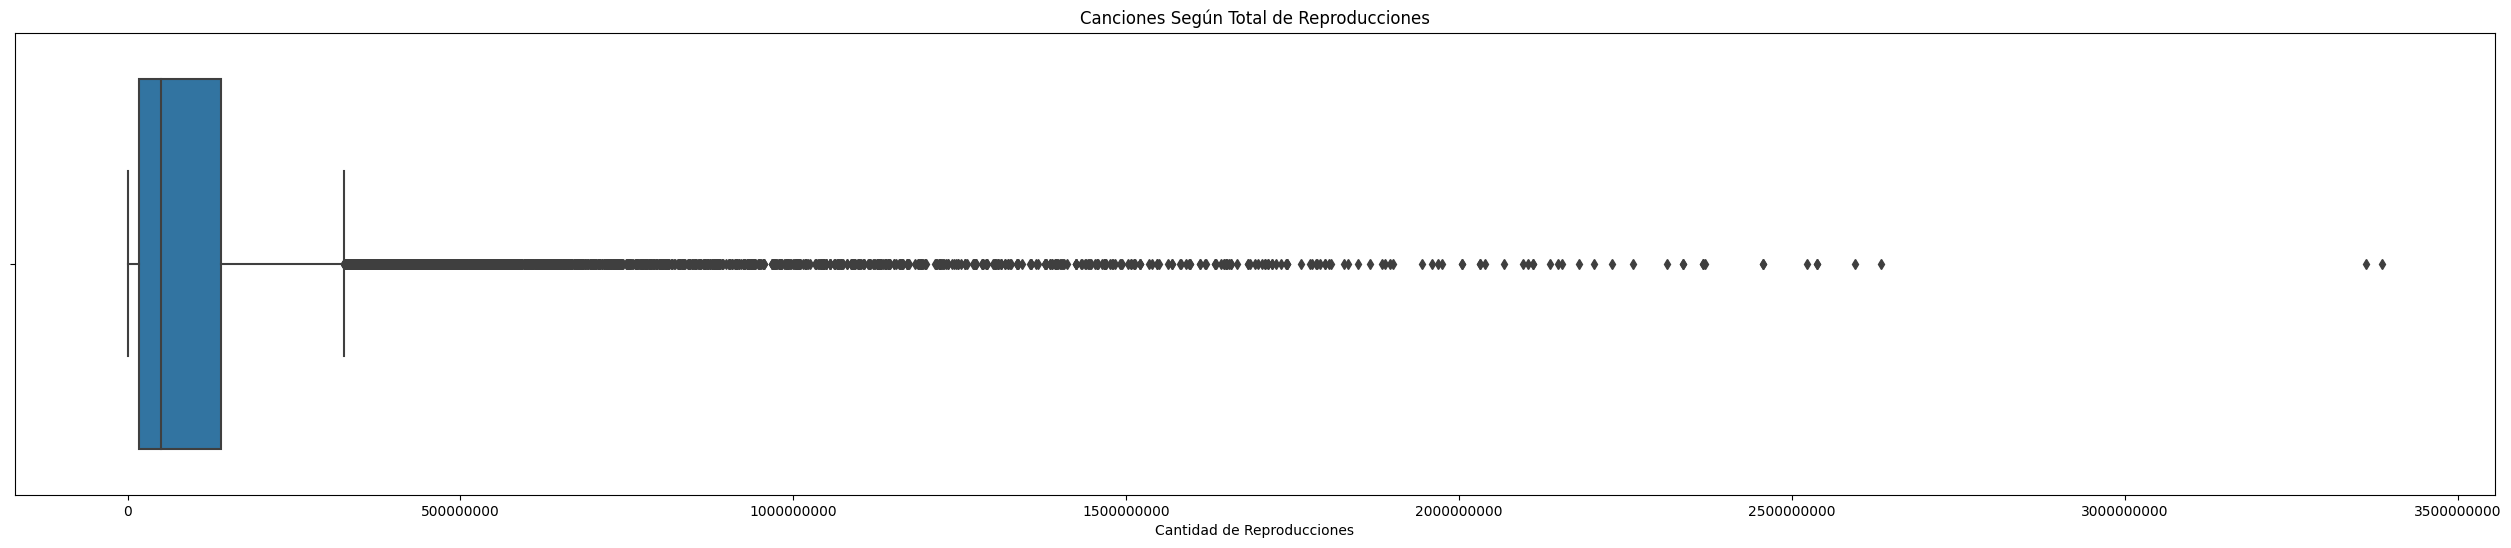

In [ ]:
fig, ax = plt.subplots (figsize = (32,6))
sns.boxplot(data=df_Spotify_nonan, x="Stream")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Canciones Según Total de Reproducciones")
ax.set_xlabel("Cantidad de Reproducciones")

Text(0.5, 0, 'Cantidad de Visualizaciones')

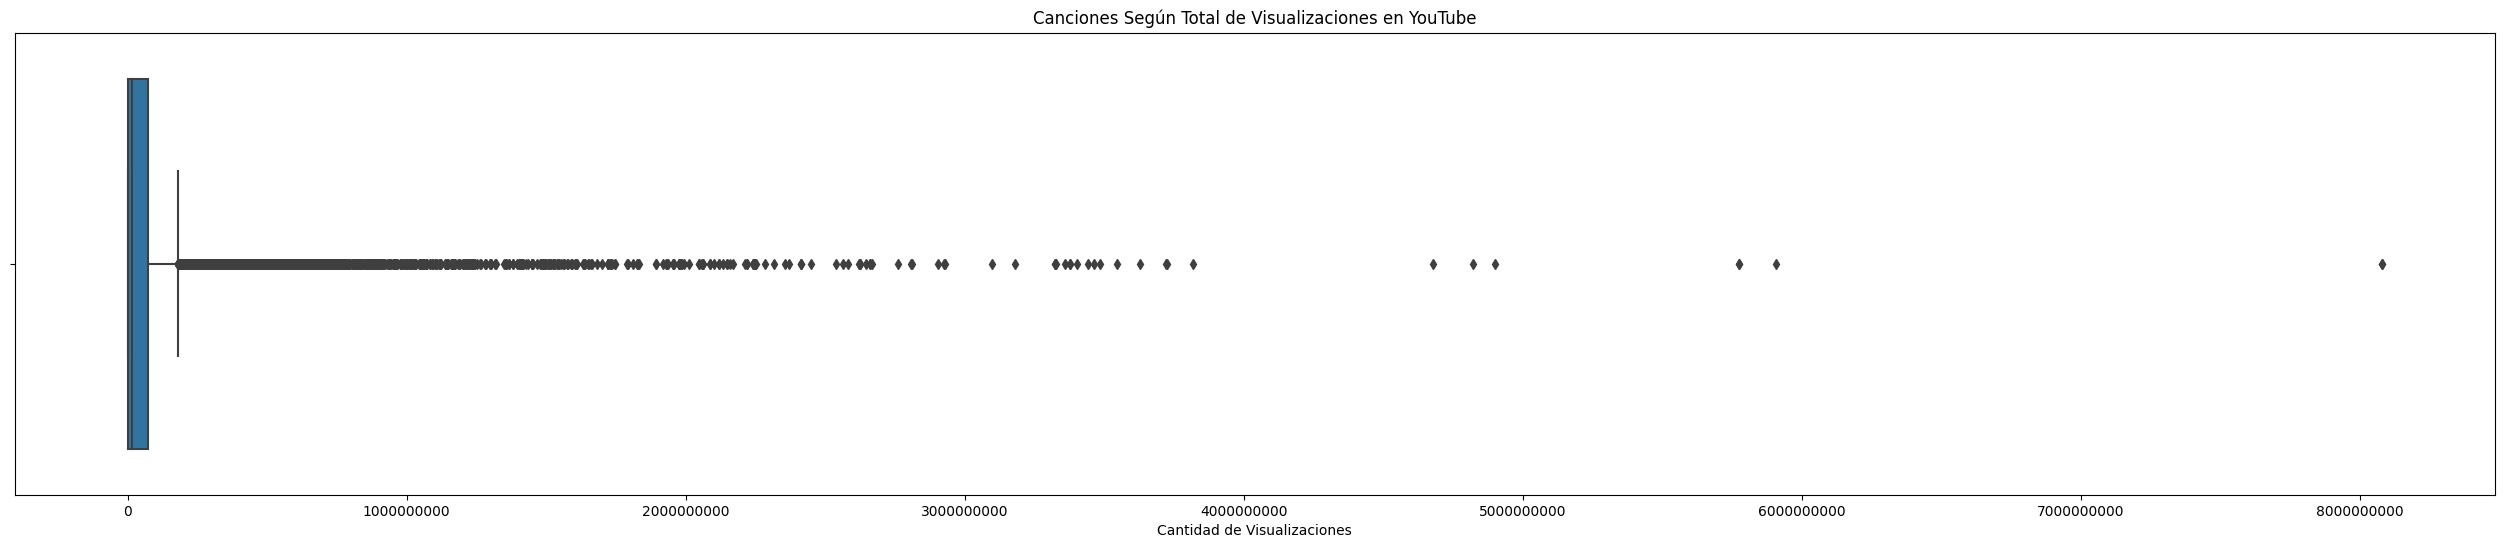

In [ ]:
fig, ax = plt.subplots (figsize = (32,6))
sns.boxplot(data=df_Spotify_nonan, x="Views")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Canciones Según Total de Visualizaciones en YouTube")
ax.set_xlabel("Cantidad de Visualizaciones")

Text(0.5, 0, 'Cantidad de Comentarios')

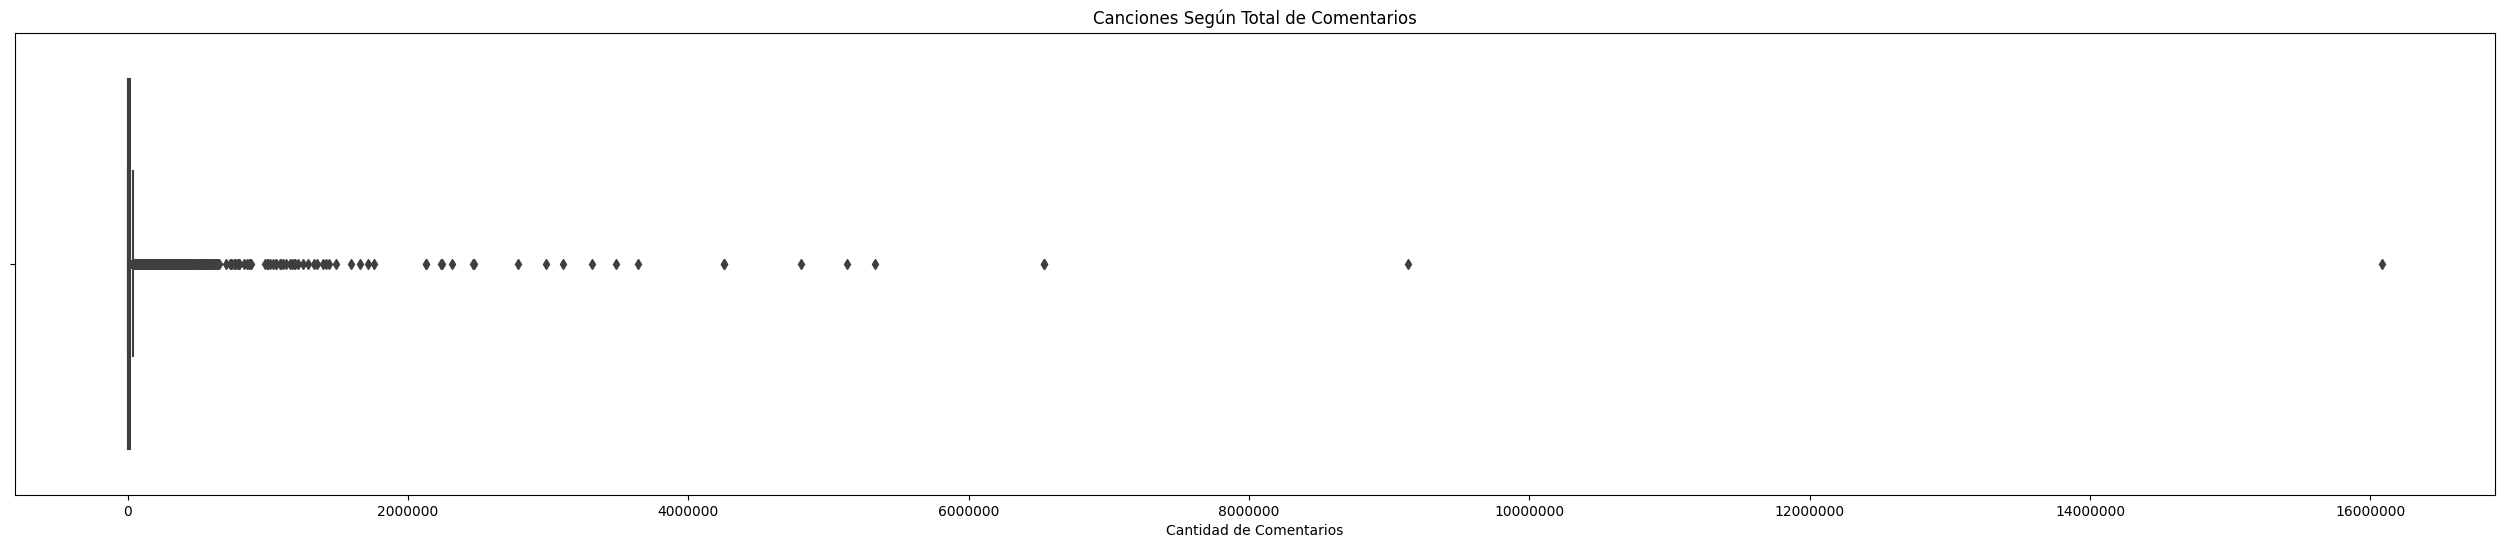

In [ ]:
fig, ax = plt.subplots (figsize = (32,6))
sns.boxplot(data=df_Spotify_nonan, x="Comments")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Canciones Según Total de Comentarios")
ax.set_xlabel("Cantidad de Comentarios")

Text(0.5, 0, 'Cantidad de Likes')

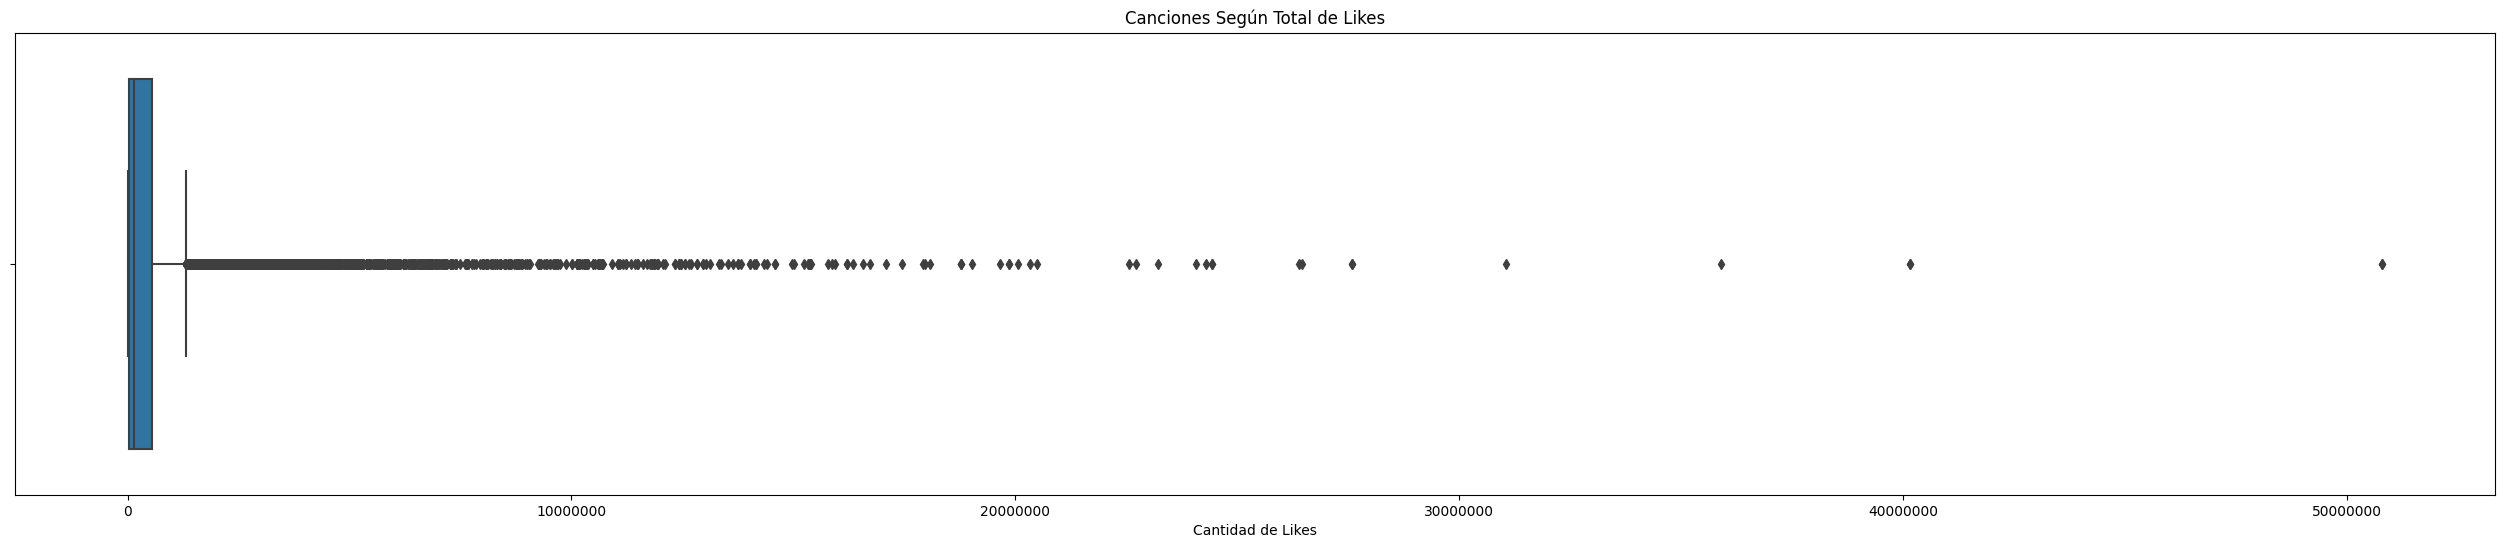

In [ ]:
fig, ax = plt.subplots (figsize = (32,6))
sns.boxplot(data=df_Spotify_nonan, x="Likes")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Canciones Según Total de Likes")
ax.set_xlabel("Cantidad de Likes")

# Canciones según cantidad de reproducciones

En primer lugar revisamos si la cantidad de reproducciones de las canciones nos muestran alguna agrupación a tener en cuenta.

In [ ]:
fig, ax = plt.subplots (figsize = (12,6))
sns.histplot(data=df_Spotify, x="Stream")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Canciones Según Cantidad de Reproducciones")
ax.set_xlabel("Reproducciones")
ax.set_ylabel("Cantidad de Canciones")

Text(0, 0.5, 'Cantidad de Canciones')

Observamos que la mayoría de las canciones tienen muy pocas reproducciones.

Y no aparecen grupos a primera vista que puedan ser indentificados.

##¿Hay tonalidades más usadas?

Siguiendo con esta línea, comprobamos si hay alguna tonalidad más ustilizada.

Hacemos un ranking de uso de los tonos y con un gráfico de barras observamos que no hay diferencias significativas en el uso de los tonos.

In [ ]:
df_Spotify_Tono_mas_usado = df_Spotify_nonan.groupby(['Key']).agg({'Key': "count"})
df_Spotify_Tono_mas_usado.rename(columns = {'Key':'Cantidad Usada'}, inplace = True)
df_Spotify_Tono_mas_usado = df_Spotify_Tono_mas_usado.sort_values(by='Cantidad Usada', ascending=False).reset_index()
df_Spotify_Tono_mas_usado

,Key,Cantidad Usada
0,0.0,2154
1,7.0,2080
2,1.0,2058
3,2.0,1852
4,9.0,1829
5,5.0,1601
6,11.0,1548
7,4.0,1397
8,8.0,1364
9,6.0,1343


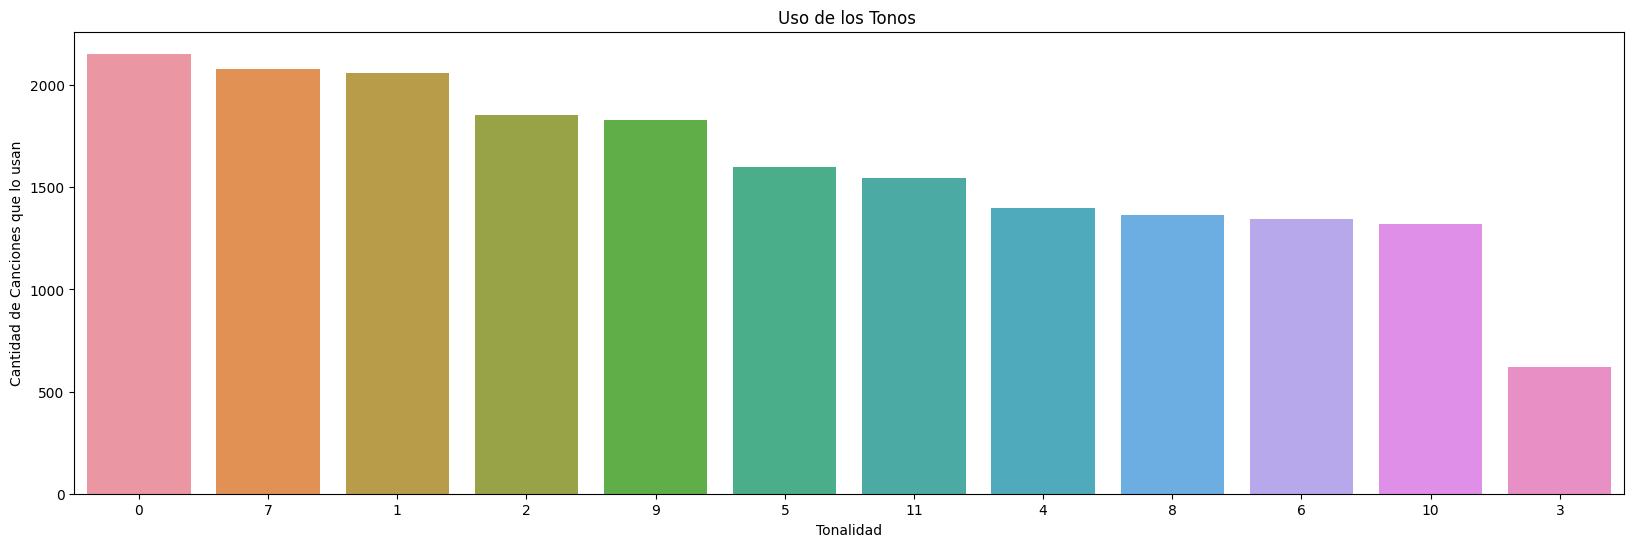

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(data=df_Spotify_Tono_mas_usado, x="Key", y="Cantidad Usada", order=(0,7,1,2,9,5,11,4,8,6,10,3))
ax.set_title ("Uso de los Tonos ")
ax.set_xlabel("Tonalidad")
ax.set_ylabel("Cantidad de Canciones que lo usan")
plt.show()

La tonalidad RE# (3) es la menos utilizada y se corresponde con el análisis anterior que también es la menos es cuchada. Tiene sentido porque si hay menos canciones en esa tonalidad, va a tener menos reproducciones.

#¿Hay alguna relación entre la cantidad de Reproducciones, Likes y Comentarios por Artista?

Los gráficos de más abajo muestran las reproducciones, los likes y los comentarios totales por artista.

Es llamativo que los artistas más escuchados no conicidan con los que tienen más likes.

Por ejemplo BTS es el grupo musical con más likes, pero no aparece en el top 20 de artistas con más reproducciones.

A la inversa, Post Malone es el artista con más reproducciones, pero no aparece entre los 20 artistas con más likes.

Este comportamiento puede explicarse si se tiene en cuenta que una canción puede reproducirse cuantas veces se quiera y el like va a contar solo una vez.

También podría explicarse por el grado de participación de la audiencia. Quizás los oyentes de un artista o grupo tiendan a ser más participativos que otros. Refuerza esta hipótesis el hecho de que los dos grupos con más likes (BTS y BLACKPINK) son también los que más comentarios tienen.

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
df_Spotify_Reproducciones_por_artista = df_Spotify_nonan.groupby(['Artist']).agg({'Stream': "sum"}).reset_index()
df_Spotify_Reproducciones_por_artista.rename(columns = {'Stream':'Total Reproducciones'}, inplace = True)
df_Spotify_Reproducciones_por_artista = df_Spotify_Reproducciones_por_artista.sort_values(by='Total Reproducciones', ascending=False)
df_Spotify_Reproducciones_por_artista.reset_index(drop=True, inplace=True)
df_Spotify_Reproducciones_por_artista.head(20)

,Artist,Total Reproducciones
0,Post Malone,"15,251,263,853"
1,Ed Sheeran,"14,394,881,557"
2,Dua Lipa,"13,408,076,274"
3,The Weeknd,"12,464,283,476"
4,XXXTENTACION,"12,011,910,355"
5,Imagine Dragons,"11,858,310,928"
6,Coldplay,"11,778,478,236"
7,Khalid,"11,386,839,915"
8,Ariana Grande,"10,857,411,888"
9,Billie Eilish,"10,747,172,641"


Text(0, 0.5, 'Artista')

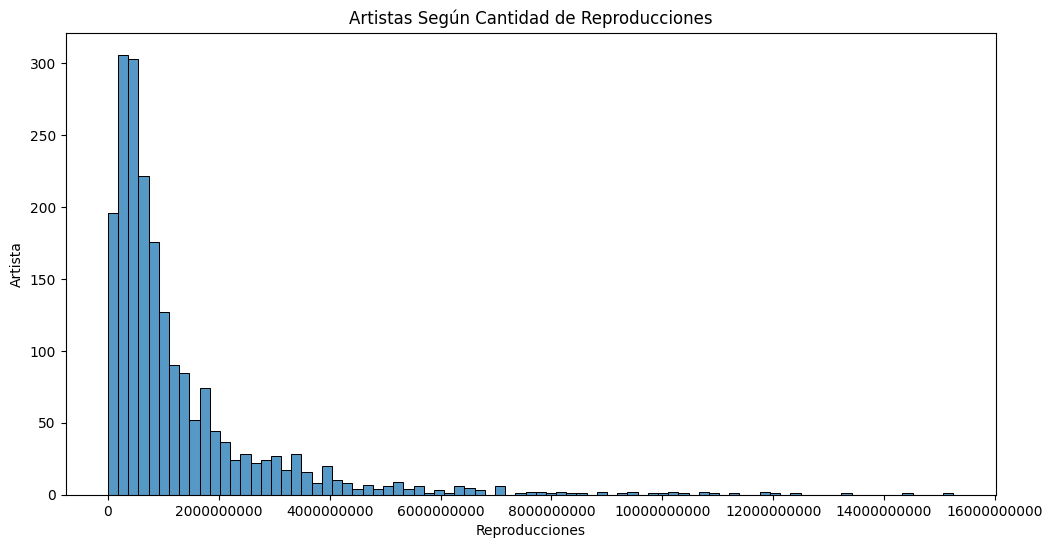

In [ ]:
fig, ax = plt.subplots (figsize = (12,6))
sns.histplot(data=df_Spotify_Reproducciones_por_artista, x="Total Reproducciones")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Artistas Según Cantidad de Reproducciones")
ax.set_xlabel("Reproducciones")
ax.set_ylabel("Artista")

In [ ]:
df_spotify_likes_por_artista = df_Spotify_nonan.groupby(['Artist']).agg({'Likes': "sum"}).reset_index()
df_spotify_likes_por_artista.rename(columns = {'Likes':'Total Likes'}, inplace = True)
df_spotify_likes_por_artista = df_spotify_likes_por_artista.sort_values(by='Total Likes', ascending=False)
df_spotify_likes_por_artista.reset_index(drop=True, inplace=True)
df_spotify_likes_por_artista.head(20)

,Artist,Total Likes
0,BTS,"139,403,808"
1,BLACKPINK,"132,302,505"
2,Charlie Puth,"86,336,925"
3,Ed Sheeran,"83,543,319"
4,Justin Bieber,"78,579,227"
5,Billie Eilish,"73,338,537"
6,Imagine Dragons,"72,274,477"
7,Alan Walker,"67,977,702"
8,DJ Snake,"67,775,831"
9,Luis Fonsi,"66,908,489"


Text(0, 0.5, 'Artista')

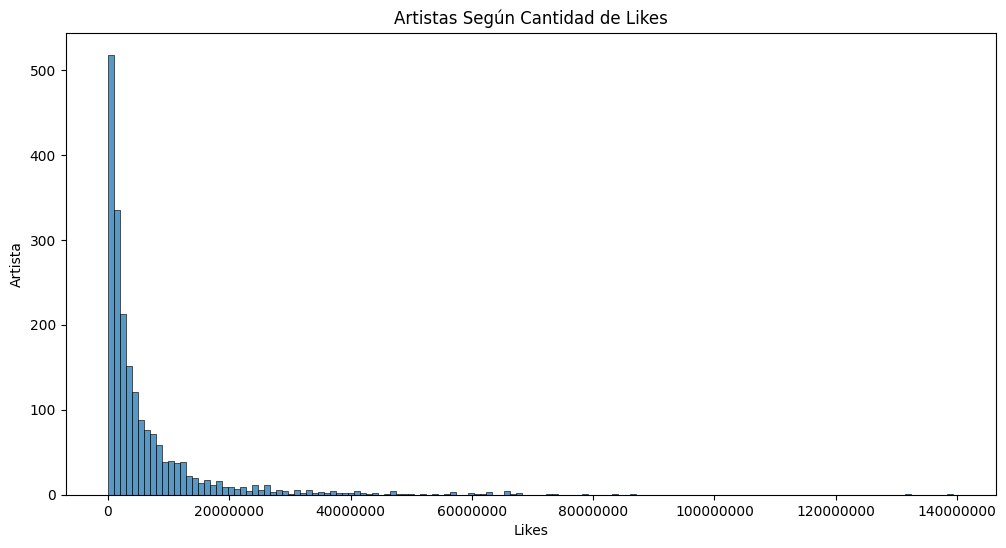

In [ ]:
fig, ax = plt.subplots (figsize = (12,6))
sns.histplot(data=df_spotify_likes_por_artista, x="Total Likes")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Artistas Según Cantidad de Likes")
ax.set_xlabel("Likes")
ax.set_ylabel("Artista")

In [ ]:
df_Spotify_Comentarios_por_artista = df_Spotify_nonan.groupby(['Artist']).agg({'Comments': "sum"}).reset_index()
df_Spotify_Comentarios_por_artista.rename(columns = {'Comments':'Total Comentarios'}, inplace = True)
df_Spotify_Comentarios_por_artista = df_Spotify_Comentarios_por_artista.sort_values(by='Total Comentarios', ascending=False)
df_Spotify_Comentarios_por_artista.reset_index(drop=True, inplace=True)
df_Spotify_Comentarios_por_artista.head(20)

,Artist,Total Comentarios
0,BTS,"39,542,659"
1,BLACKPINK,"19,605,027"
2,Stray Kids,"8,458,365"
3,TWICE,"8,384,985"
4,PSY,"7,311,608"
5,Justin Bieber,"7,258,967"
6,EXO,"6,981,950"
7,Halsey,"6,981,661"
8,One Direction,"6,360,892"
9,Luis Fonsi,"4,703,428"


Text(0, 0.5, 'Artista')

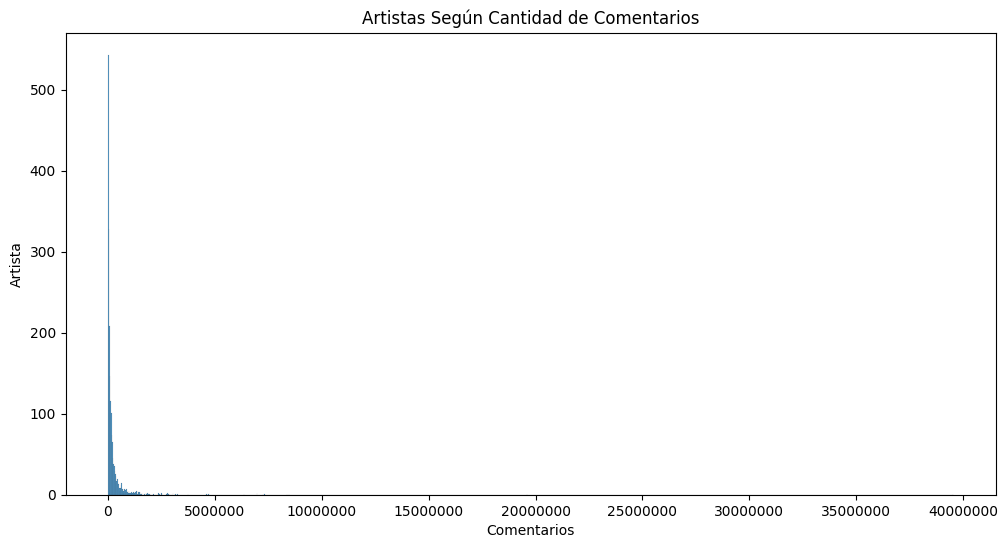

In [ ]:
fig, ax = plt.subplots (figsize = (12,6))
sns.histplot(data=df_Spotify_Comentarios_por_artista, x="Total Comentarios")
plt.ticklabel_format(style="plain", axis="x")
ax.set_title ("Artistas Según Cantidad de Comentarios")
ax.set_xlabel("Comentarios")
ax.set_ylabel("Artista")

#¿Hay tonalidades más escuchadas que otras?

Partimos de la hipótesis que cualidades intrísecas a la canción, como el tono en el que están compuestas, pueden tener relación con la cantidad de reproudcciones.

Para revisarlo, hacemos un ranking de las tonalidades de las canciones según cantidad de reproducciones.

Y observamos como están distribuidas las reproducciones según la tonalidad de las canciones con un gráfico de dispersión.

In [ ]:
df_Spotify_Reproducciones_por_Tono = df_Spotify_nonan.groupby(['Key']).agg({'Stream': "sum"})
df_Spotify_Reproducciones_por_Tono.rename(columns = {'Stream':'Total Reproducciones'}, inplace = True)
df_Spotify_Reproducciones_por_Tono = df_Spotify_Reproducciones_por_Tono.sort_values(by='Total Reproducciones', ascending=False).reset_index()
df_Spotify_Reproducciones_por_Tono

,Key,Total Reproducciones
0,1,"325,897,860,537"
1,0,"299,994,319,635"
2,7,"259,231,105,239"
3,2,"235,624,634,475"
4,11,"235,175,328,661"
5,5,"226,697,405,472"
6,9,"221,455,202,476"
7,6,"200,143,256,642"
8,8,"199,460,274,229"
9,4,"184,223,485,128"


In [ ]:
df_Spotify_Reproducciones_por_Tono.describe()

,Key,Total Reproducciones
count,12,12
mean,6,"220,893,746,250"
std,4,"62,253,338,319"
min,0,"80,549,524,900"
25%,3,"195,651,076,954"
50%,6,"224,076,303,974"
75%,8,"241,526,252,166"
max,11,"325,897,860,537"


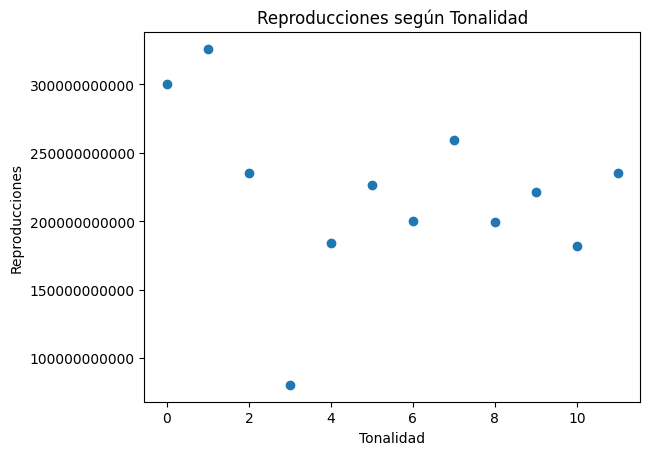

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_Spotify_Reproducciones_por_Tono["Key"], df_Spotify_Reproducciones_por_Tono["Total Reproducciones"])
ax.set_title ("Reproducciones según Tonalidad")
ax.set_xlabel("Tonalidad")
ax.set_ylabel("Reproducciones")
plt.ticklabel_format(style="plain", axis="y")

Podemos ver que la mayoría de las tonalidades están entre 190 mil millones y 260 mil millones de reproducciones totales.

Solo la tonalidad RE# (3) está por debajo de los 100 mil millones de reproducciones.

Mientras que DO (0) y DO# (1) son claramente las tonalidades más escuchadas.

##¿Son más escuchas las canciones que son parte de un disco o las que son lanzadas como sencillos?

El dataset tiene una variable categórica que divide las canciones entre aquellas que son parte de un album, que fueron lanzadas como single o como parte de una compilación.

A continuación revisamos si alguna de estas maneras de publicar canciones intfluye en la cantidad de reproducciones.

Para esto, agrupamos el total de reproducciones según el tipo de album y hacemos un gráfico de barras.

In [ ]:
df_Spotify_Tipo_Album = df_Spotify_nonan.groupby(['Album_type']).agg({'Album_type': "count", "Stream" : "sum"})
df_Spotify_Tipo_Album.rename(columns = {'Stream':'Total de Reproducciones', "Album_type" :"Cantidad de Canciones por tipo de Album"}, inplace = True)
df_Spotify_Tipo_Album = df_Spotify_Tipo_Album.sort_values(by="Total de Reproducciones", ascending=False).reset_index()
df_Spotify_Tipo_Album

,Album_type,Cantidad de Canciones por tipo de Album,Total de Reproducciones
0,album,13845,"2,114,051,257,549"
1,single,4636,"477,163,146,554"
2,compilation,689,"59,510,550,900"


Text(0, 0.5, 'Cantidad de Reproducciones')

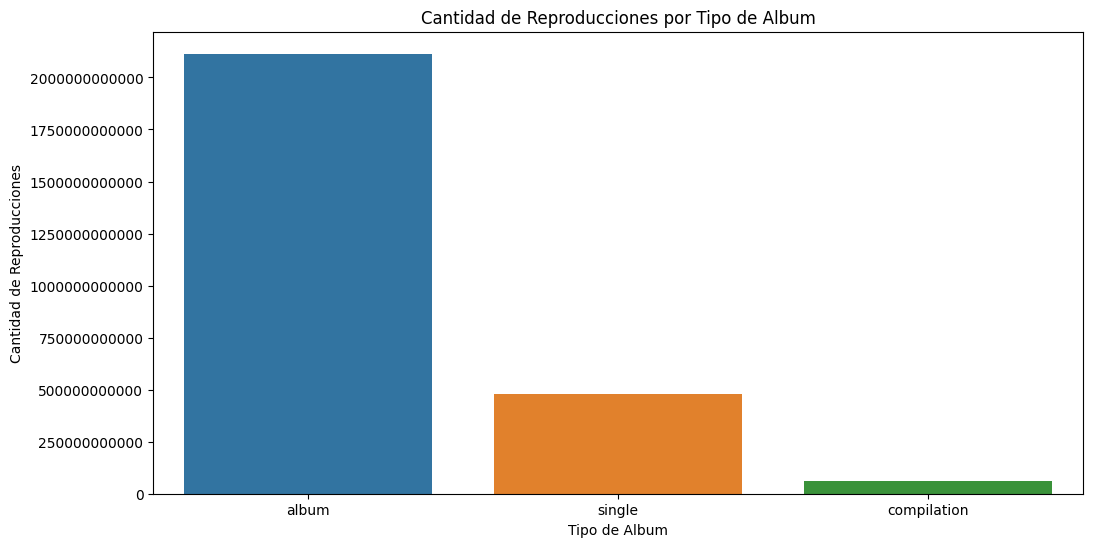

In [ ]:
fig, ax = plt.subplots (figsize = (12,6))
sns.barplot(data=df_Spotify_Tipo_Album, x="Album_type", y="Total de Reproducciones")
plt.ticklabel_format(style="plain", axis="y")
ax.set_title ("Cantidad de Reproducciones por Tipo de Album")
ax.set_xlabel("Tipo de Album")
ax.set_ylabel("Cantidad de Reproducciones")

Text(0, 0.5, 'Cantidad de Canciones')

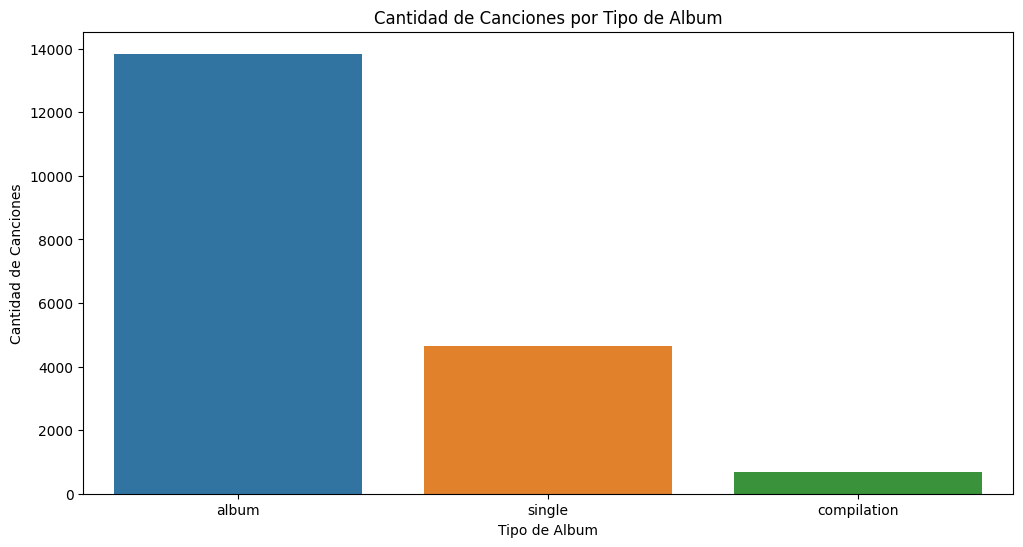

In [ ]:
fig, ax = plt.subplots (figsize = (12,6))
sns.barplot(data=df_Spotify_Tipo_Album, x="Album_type", y="Cantidad de Canciones por tipo de Album")
ax.set_title ("Cantidad de Canciones por Tipo de Album")
ax.set_xlabel("Tipo de Album")
ax.set_ylabel("Cantidad de Canciones")

Observamos que la mayoría de las escuchas entán dentro de álbumes.

Pero esas canciones representan el 75% del dataset por lo que es de esperarse que tengan mayor cantidad de reproducciones.